In [68]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
# reading data in a dataframe
data = pd.read_csv('Task1.csv')
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [70]:
# performing data preprocessing
data = data.dropna()
data = data.drop_duplicates()
data = data.reset_index(drop=True)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Single,...,4~8,4~8,1~3,never,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1


/var/folders/5f/1b1zms0j03d6wzq402h8fw8c0000gn/T/ipykernel_35873/3330056781.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot: >

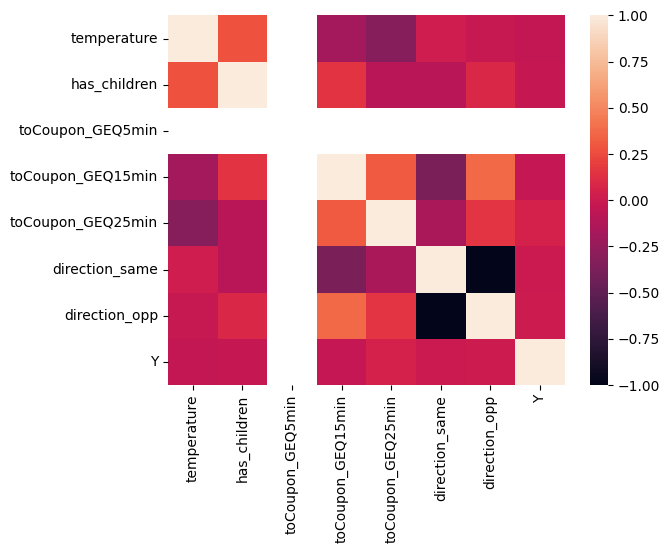

In [71]:
# plotting correlation matrix
import seaborn as sns
corr = data.corr()
sns.heatmap(corr)

In [72]:
# dropping direction_opp column as it has high negative correlation with direction_same
data = data.drop('direction_opp', axis=1)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Single,...,less1,4~8,4~8,1~3,never,1,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Single,...,less1,4~8,4~8,1~3,never,1,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,less1,4~8,4~8,1~3,never,1,0,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Single,...,less1,4~8,4~8,1~3,never,1,1,0,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Single,...,less1,4~8,4~8,1~3,never,1,0,0,0,1


In [73]:
# converting numerical data to categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in data.columns:
    data[i] = le.fit_transform(data[i])
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,1,0,2,1,2,4,0,1,1,1,...,1,1,1,0,2,0,0,0,0,1
1,1,1,2,2,0,2,1,1,1,1,...,1,1,1,0,2,0,0,0,0,0
2,1,1,2,2,0,0,0,1,1,1,...,1,1,1,0,2,0,0,0,0,1
3,1,1,2,2,0,1,1,1,1,1,...,1,1,1,0,2,0,1,0,0,0
4,1,1,2,2,2,2,0,1,1,1,...,1,1,1,0,2,0,0,0,0,1


In [74]:
# Use any algorithm to perform classification. Use a validation set and k-fold cross validation to improve the accuracy
# splitting data into training and testing set
from sklearn.model_selection import train_test_split
X = data.drop('Y', axis=1)
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# training the model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

# predicting the test set results
y_pred = classifier.predict(X_test)

# calculating accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4090909090909091

In [75]:
# using k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
accuracies.mean()

# using grid search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [1,5,10, 100, 1000], 'criterion': ['gini', 'entropy']}]
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best Accuracy: {:.2f} %'.format(best_accuracy*100))
print('Best Parameters:', best_parameters)

Best Accuracy: 73.19 %
Best Parameters: {'criterion': 'gini', 'n_estimators': 100}


In [76]:
# updating the model with the best parameters
classifier = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0)
classifier.fit(X_train, y_train)

# predicting the test set results
y_pred = classifier.predict(X_test)

# calculating accuracy
accuracy_score(y_test, y_pred)

0.4090909090909091

<AxesSubplot: >

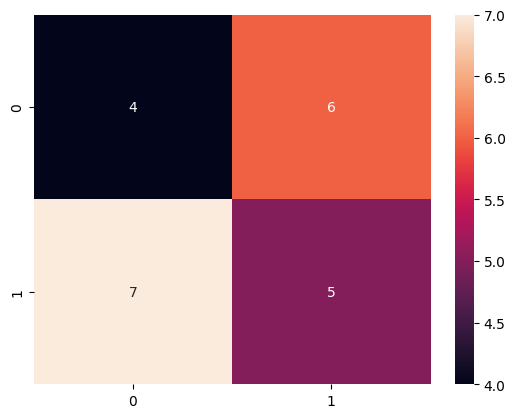

In [77]:
# calculating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# plotting confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True)

In [78]:
# Accuracy, Error Rate, Precision, Recall, F1-Score, Sensitivity, Specificity
tp = cm[0][0]
tn = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]

accuracy = (tp+tn)/(tp+tn+fp+fn)
error_rate = (fp+fn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2*precision*recall/(precision+recall)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

# printing the results as a dataframe
results = pd.DataFrame([['Random Forest', accuracy, error_rate, precision, recall, f1_score, sensitivity, specificity]], columns=['Model', 'Accuracy', 'Error Rate', 'Precision', 'Recall', 'F1-Score', 'Sensitivity', 'Specificity'])
results

,Model,Accuracy,Error Rate,Precision,Recall,F1-Score,Sensitivity,Specificity
0,Random Forest,0.409091,0.590909,0.4,0.363636,0.380952,0.363636,0.454545


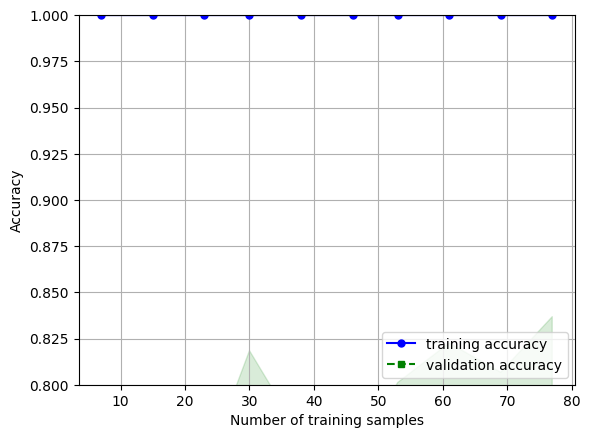

In [79]:
# plotting accuracy curves for training and validation set
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=classifier, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

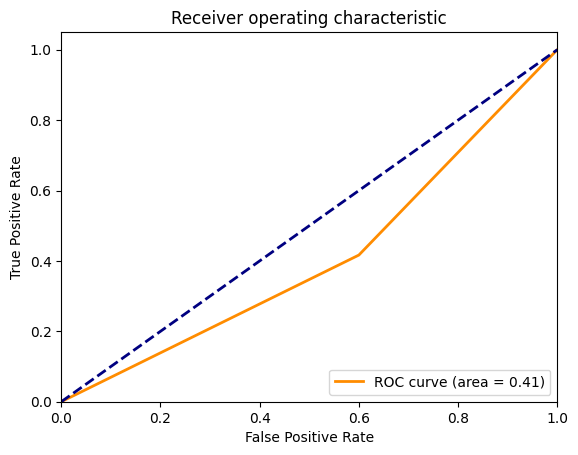

In [80]:
# plotting ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()